In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib as mpl

# Set common parameters
params = {
    'figure.figsize': (12, 8),  # Adjust the figure size
    'axes.labelsize': 14,  # Label font size
    'axes.titlesize': 16,  # Title font size
    'xtick.labelsize': 12,  # X-axis tick label font size
    'ytick.labelsize': 12,  # Y-axis tick label font size
    'legend.fontsize': 12,  # Legend font size
    'lines.linewidth': 2.0,  # Line width
    'axes.grid': True,  # Show grid lines
    'axes.grid.axis': 'x'
}
pd.set_option('display.max_columns', None)
mpl.rcParams.update(params)

# Exploratory Data Analysis 

<details>
    <summary>▶️ <b>Column Info:</b> (click to expand) </summary>

Below are fields in the order that they appear on the records:<br><br>
**Year:**	Year<br>
**Quarter:**	Quarter (1-4)<br>
**Month:**	Month<br>
**DayofMonth:**	Day of Month<br>
**DayOfWeek:**	Day of Week<br>
**FlightDate:**	Flight Date (yyyymmdd)<br>
**Reporting_Airline:**	Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.<br>
**DOT_ID_Reporting_Airline:**	An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.<br>
**IATA_CODE_Reporting_Airline:**	Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.<br>
**Tail_Number:**	Tail Number<br>
**Flight_Number_Reporting_Airline:**	Flight Number<br>
**OriginAirportID:**	Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.<br>
**OriginAirportSeqID:**	Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.<br>
**OriginCityMarketID:**	Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.<br>
**Origin:**	Origin Airport<br>
**OriginCityName:**	Origin Airport, City Name<br>
**OriginState:**	Origin Airport, State Code<br>
**OriginStateFips:**	Origin Airport, State Fips<br>
**OriginStateName:**	Origin Airport, State Name<br>
**OriginWac:**	Origin Airport, World Area Code<br>
**DestAirportID:**	Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.<br>
**DestAirportSeqID:**	Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.<br>
**DestCityMarketID:**	Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.<br>
**Dest:**	Destination Airport<br>
**DestCityName:**	Destination Airport, City Name<br>
**DestState:**	Destination Airport, State Code<br>
**DestStateFips:**	Destination Airport, State Fips<br>
**DestStateName:**	Destination Airport, State Name<br>
**DestWac:**	Destination Airport, World Area Code<br>
**CRSDepTime:**	CRS Departure Time (local time: hhmm)<br>
**DepTime:**	Actual Departure Time (local time: hhmm)<br>
**DepDelay:**	Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.<br>
**DepDelayMinutes:**	Difference in minutes between scheduled and actual departure time. Early departures set to 0.<br>
**DepDel15:**	Departure Delay Indicator, 15 Minutes or More (1=Yes)<br>
**DepartureDelayGroups:**	Departure Delay intervals, every (15 minutes from <-15 to >180)<br>
**DepTimeBlk:**	CRS Departure Time Block, Hourly Intervals<br>
**TaxiOut:**	Taxi Out Time, in Minutes<br>
**WheelsOff:**	Wheels Off Time (local time: hhmm)<br>
**WheelsOn:**	Wheels On Time (local time: hhmm)<br>
**TaxiIn:**	Taxi In Time, in Minutes<br>
**CRSArrTime:**	CRS Arrival Time (local time: hhmm)<br>
**ArrTime:**	Actual Arrival Time (local time: hhmm)<br>
**ArrDelay:**	Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.<br>
**ArrDelayMinutes:**	Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.<br>
**ArrDel15:**	Arrival Delay Indicator, 15 Minutes or More (1=Yes)<br>
**ArrivalDelayGroups:**	Arrival Delay intervals, every (15-minutes from <-15 to >180)<br>
**ArrTimeBlk:**	CRS Arrival Time Block, Hourly Intervals<br>
**Cancelled:**	Cancelled Flight Indicator (1=Yes)<br>
**CancellationCode:**	Specifies The Reason For Cancellation<br>
**Diverted:**	Diverted Flight Indicator (1=Yes)<br>
**CRSElapsedTime:**	CRS Elapsed Time of Flight, in Minutes<br>
**ActualElapsedTime:**	Elapsed Time of Flight, in Minutes<br>
**AirTime:**	Flight Time, in Minutes<br>
**Flights:**	Number of Flights<br>
**Distance:**	Distance between airports (miles)<br>
**DistanceGroup:**	Distance Intervals, every 250 Miles, for Flight Segment<br>
**CarrierDelay:**	Carrier Delay, in Minutes<br>
**WeatherDelay:**	Weather Delay, in Minutes<br>
**NASDelay:**	National Air System Delay, in Minutes<br>
**SecurityDelay:**	Security Delay, in Minutes<br>
**LateAircraftDelay:**	Late Aircraft Delay, in Minutes<br>
**FirstDepTime:**	First Gate Departure Time at Origin Airport<br>
**TotalAddGTime:**	Total Ground Time Away from Gate for Gate Return or Cancelled Flight<br>
**LongestAddGTime:**	Longest Time Away from Gate for Gate Return or Cancelled Flight<br>
**DivAirportLandings:**	Number of Diverted Airport Landings<br>
**DivReachedDest:**	Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)<br>
**DivActualElapsedTime:**	Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.<br>
**DivArrDelay:**	Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.<br>
**DivDistance:**	Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination.<br>

</details>

In [2]:
flight_data = pd.read_csv('./flights.csv')
airlines_df = pd.read_csv('./airlines.csv')
airports_df = pd.read_csv('./airports.csv')

<ipython-input-2-4dc681ac0cc0>:1: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv('./flights.csv')


In [3]:
flight_data.head(5)

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum,div3airport,div3airportid,div3airportseqid,div3wheelson,div3totalgtime,div3longestgtime,div3wheelsoff,div3tailnum,div4airport,div4airportid,div4airportseqid,div4wheelson,div4totalgtime,div4longestgtime,div4wheelsoff,div4tailnum,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,empty_col
0,2021,4,12,8,3,2021-12-08,OH,20397,OH,N522AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1811.0,-3.0,0.0,0.0,-1.0,1800-1859,12.0,1823.0,1917.0,14.0,1939,1931.0,-8.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,80.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,4,12,9,4,2021-12-09,OH,20397,OH,N529EA,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,21.0,1824.0,1928.0,6.0,1939,1934.0,-5.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,91.0,64.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,4,12,10,5,2021-12-10,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1812.0,-2.0,0.0,0.0,-1.0,1800-1859,27.0,1839.0,1933.0,6.0,1939,1939.0,0.0,0.0,0.0,0.0,1900-1959,0.0,NaN,0.0,85.0,87.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,4,12,11,6,2021-12-11,OH,20397,OH,N531EG,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1846.0,32.0,32.0,1.0,2.0,1800-1859,16.0,1902.0,1957.0,7.0,1939,2004.0,25.0,25.0,1.0,1.0,1900-1959,0.0,NaN,0.0,85.0,78.0,55.0,1.0,221.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,4,12,12,7,2021-12-12,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1808.0,-6.0,0.0,0.0,-1.0,1800-1859,15.0,1823.0,1912.0,7.0,1939,1919.0,-20.0,0.0,0.0,-2.0,1900-1959,

In [4]:
# Define a subset of columns for initial investigation
useful_columns = [
    "year",
    "quarter",
    "month",
    "dayofmonth",
    "dayofweek",
    "flightdate",
    "reporting_airline",
    'iata_code_reporting_airline',
    "origin",
    "dest",
    "crsdeptime",
    "deptime",
    "depdelay",
    "depdelayminutes",
    "depdel15",
    "crsarrtime",
    "arrtime",
    "arrdelay",
    "arrdelayminutes",
    "arrdel15",
    "cancelled",
    "cancellationcode",
    "diverted",
    "crselapsedtime",
    "actualelapsedtime",
    "airtime",
    "flights",
    "distance",
    "distancegroup",
    "carrierdelay",
    "weatherdelay",
    "nasdelay",
    "securitydelay",
    "lateaircraftdelay",
]

cancellation_codes_map = {
    "A": "carrier",
    "B": "weather",
    "C": "national air system",
    "D": "security"
}

In [5]:
flights_df = flight_data[useful_columns].copy()
flights_df.drop_duplicates(inplace=True)

In [6]:
# Use other csvs to populate airline and airport information
flights_df = flights_df.merge(airlines_df,
                              how='left',
                              left_on='iata_code_reporting_airline',
                              right_on='IATA_CODE')
flights_df = flights_df.merge(airports_df,
                              how='left',
                              left_on='origin',
                              right_on='IATA_CODE',
                              suffixes=[None, "_origin"])
flights_df = flights_df.merge(airports_df,
                              how='left',
                              left_on='dest',
                              right_on='IATA_CODE',
                              suffixes=[None, "_dest"])

#Convert flighdate column to datetime
flights_df['flightdate'] = pd.to_datetime(flights_df['flightdate'],
                                          format='%Y-%m-%d')
#Add a period of Day Column. A day is divided into 4 quarters of 6 hours each. (00-06, 06-1200, 1200-1800, 1800-2400)
flights_df['dep_period_day'] = np.ceil(flights_df['crsdeptime'] /
                                       600).apply(int)

In [7]:
#Look at distribution of data
flights_df.describe()

,year,quarter,month,dayofmonth,dayofweek,flightdate,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,cancelled,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,LATITUDE,LONGITUDE,LATITUDE_dest,LONGITUDE_dest,dep_period_day
count,1113874.0,1113874.0,1.113874e+06,1.113874e+06,1.113874e+06,1113874,1.113874e+06,1.097063e+06,1.097046e+06,1.097046e+06,1.097046e+06,1.113874e+06,1.096151e+06,1.094464e+06,1.094464e+06,1.094464e+06,1.113874e+06,1.113874e+06,1.113874e+06,1.094464e+06,1.094464e+06,1113874.0,1.113874e+06,1.113874e+06,204456.000000,204456.000000,204456.000000,204456.000000,204456.000000,1.112718e+06,1.112718e+06,1.112721e+06,1.112721e+06,1.113874e+06
mean,2021.0,4.0,1.150236e+01,1.575640e+01,3.899197e+00,2021-11-30 19:51:10.268271360,1.327482e+03,1.332260e+03,1.055381e+01,1.338697e+01,1.957010e-01,1.495134e+03,1.473812e+03,3.850279e+00,1.268233e+01,1.868093e-01,1.549547e-02,1.930200e-03,1.451780e+02,1.384483e+02,1.140680e+02,1.0,8.229455e+02,3.762788e+00,27.960930,3.103113,8.561749,0.212075,22.365595,3.658916e+01,-9.475097e+01,3.658843e+01,-9.475006e+01,2.746686e+00
min,2021.0,4.0,1.100000e+01,1.000000e+00,1.000000e+00,2021-11-01 00:00:00,1.000000e+00,1.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.600000e+01,1.500000e+01,8.000000e+00,1.0,3.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.348345e+01,-1.766460e+02,1.348345e+01,-1.766460e+02,1.000000e+00
25%,2021.0,4.0,1.100000e+01,8.000000e+00,2.000000e+00,2021-11-16 00:00:00,9.150000e+02,9.190000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,1.113000e+03,1.100000e+03,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.200000e+01,8.600000e+01,6.200000e+01,1.0,3.910000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.289595e+01,-1.109410e+02,3.289595e+01,-1.109410e+02,2.000000e+00
50%,2021.0,4.0,1.200000e+01,1.600000e+01,4.000000e+00,2021-12-01 00:00:00,1.317000e+03,1.325000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,1.517000e+03,1.508000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+02,1.230000e+02,9.800000e+01,1.0,6.790000e+02,3.000000e+00,9.000000,0.000000,0.000000,0.000000,0.000000,3.724433e+01,-8.790446e+01,3.724433e+01,-8.790446e+01,3.000000e+00
75%,2021.0,4.0,1.200000e+01,2.300000e+01,6.000000e+00,2021-12-16 00:00:00,1.730000e+03,1.739000e+03,9.000000e+00,9.000000e+00,0.000000e+00,1.923000e+03,1.917000e+03,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.750000e+02,1.700000e+02,1.440000e+02,1.0,1.062000e+03,5.000000e+00,27.000000,0.000000,12.000000,0.000000,26.000000,4.077724e+01,-8.094313e+01,4.077724e+01,-8.094313e+01,3.000000e+00
max,2021.0,4.0,1.200000e+01,3.100000e+01,7.000000e+00,2021-12-31 00:00:00,2.359000e+03,2.400000e+03,3.001000e+03,3.001000e+03,1.000000e+00,2.400000e+03,2.400000e+03,2.976000e+03,2.976000e+03,1.000000e+00,1.000000e+00,1.000000e+00,6.850000e+02,7.360000e+02,7.110000e+02,1.0,5.095000e+03,1.100000e+01,2976.000000,1392.000000,1147.000000,983.000000,1615.000000,7.128545e+01,1.457294e+02,7.128545e+01,1.457294e+02,4.000000e+00
std,0.0,0.0,4.999947e-01,8.804447e+00,1.993024e+00,NaN,4.868029e+02,4.983099e+02,4.712789e+01,4.618919e+01,3.967395e-01,5.117479e+02,5.300866e+02,4.868636e+01,4.528389e+01,3.897585e-01,1.235126e-01,4.389164e-02,7.256746e+01,7.230446e+01,7.062453e+01,0.0,5.938072e+02,2.322949e+00,73.771756,29.463976,20.063934,4.123292,51.086824,6.088871e+00,1.840239e+01,6.089308e+00,1.840198e+01,8.461996e-01


In [8]:
print(f"No. airlines in dataset: {len(flights_df.AIRLINE.unique())}")
print(f"No. cities: {len(flights_df.CITY.unique())}")
print(f"No. countries: {len(flights_df.COUNTRY.unique())}")
print(
    f"Flight data is from {min(flights_df.flightdate)} to {max(flights_df.flightdate)}"
)
print(f"Total no. of flights: {len(flights_df):,}")
print(f"Total Airtime: {flights_df.airtime.sum():,} minutes")
print(
    f"Proportion of Delayed Flights: {flights_df.depdel15.value_counts(normalize=True)[1]:.0%}"
)

No. airlines in dataset: 17
No. cities: 347
No. countries: 1
Flight data is from 2021-11-01 00:00:00 to 2021-12-31 00:00:00
Total no. of flights: 1,113,874
Total Airtime: 124,843,343.0 minutes
Proportion of Delayed Flights: 20%


In [9]:
# This cell was used to generate the flights-eda.html file. Commented incase ydata_profiling package is not installed.
# from ydata_profiling import ProfileReport
# profile = ProfileReport(flights_df, title="Flights EDA Report")

# # Use pandas profiling to create a summary of the dataset
# # profile.to_widgets()

# # Convert report to html for easier inspection
# profile.to_file("flights-eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualisation

In [10]:
PALETTE = [
    '#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a',
    '#ff7c43', '#ffa600'
]

In [11]:
delay_cols = [
    "flightdate",
    "AIRLINE",
    "AIRPORT",
    "AIRPORT_dest",
    "crsdeptime",
    "deptime",
    "depdelay",
    "depdelayminutes",
    "depdel15",
    "crsarrtime",
    "arrtime",
    "arrdelay",
    "arrdelayminutes",
]

## Airlines

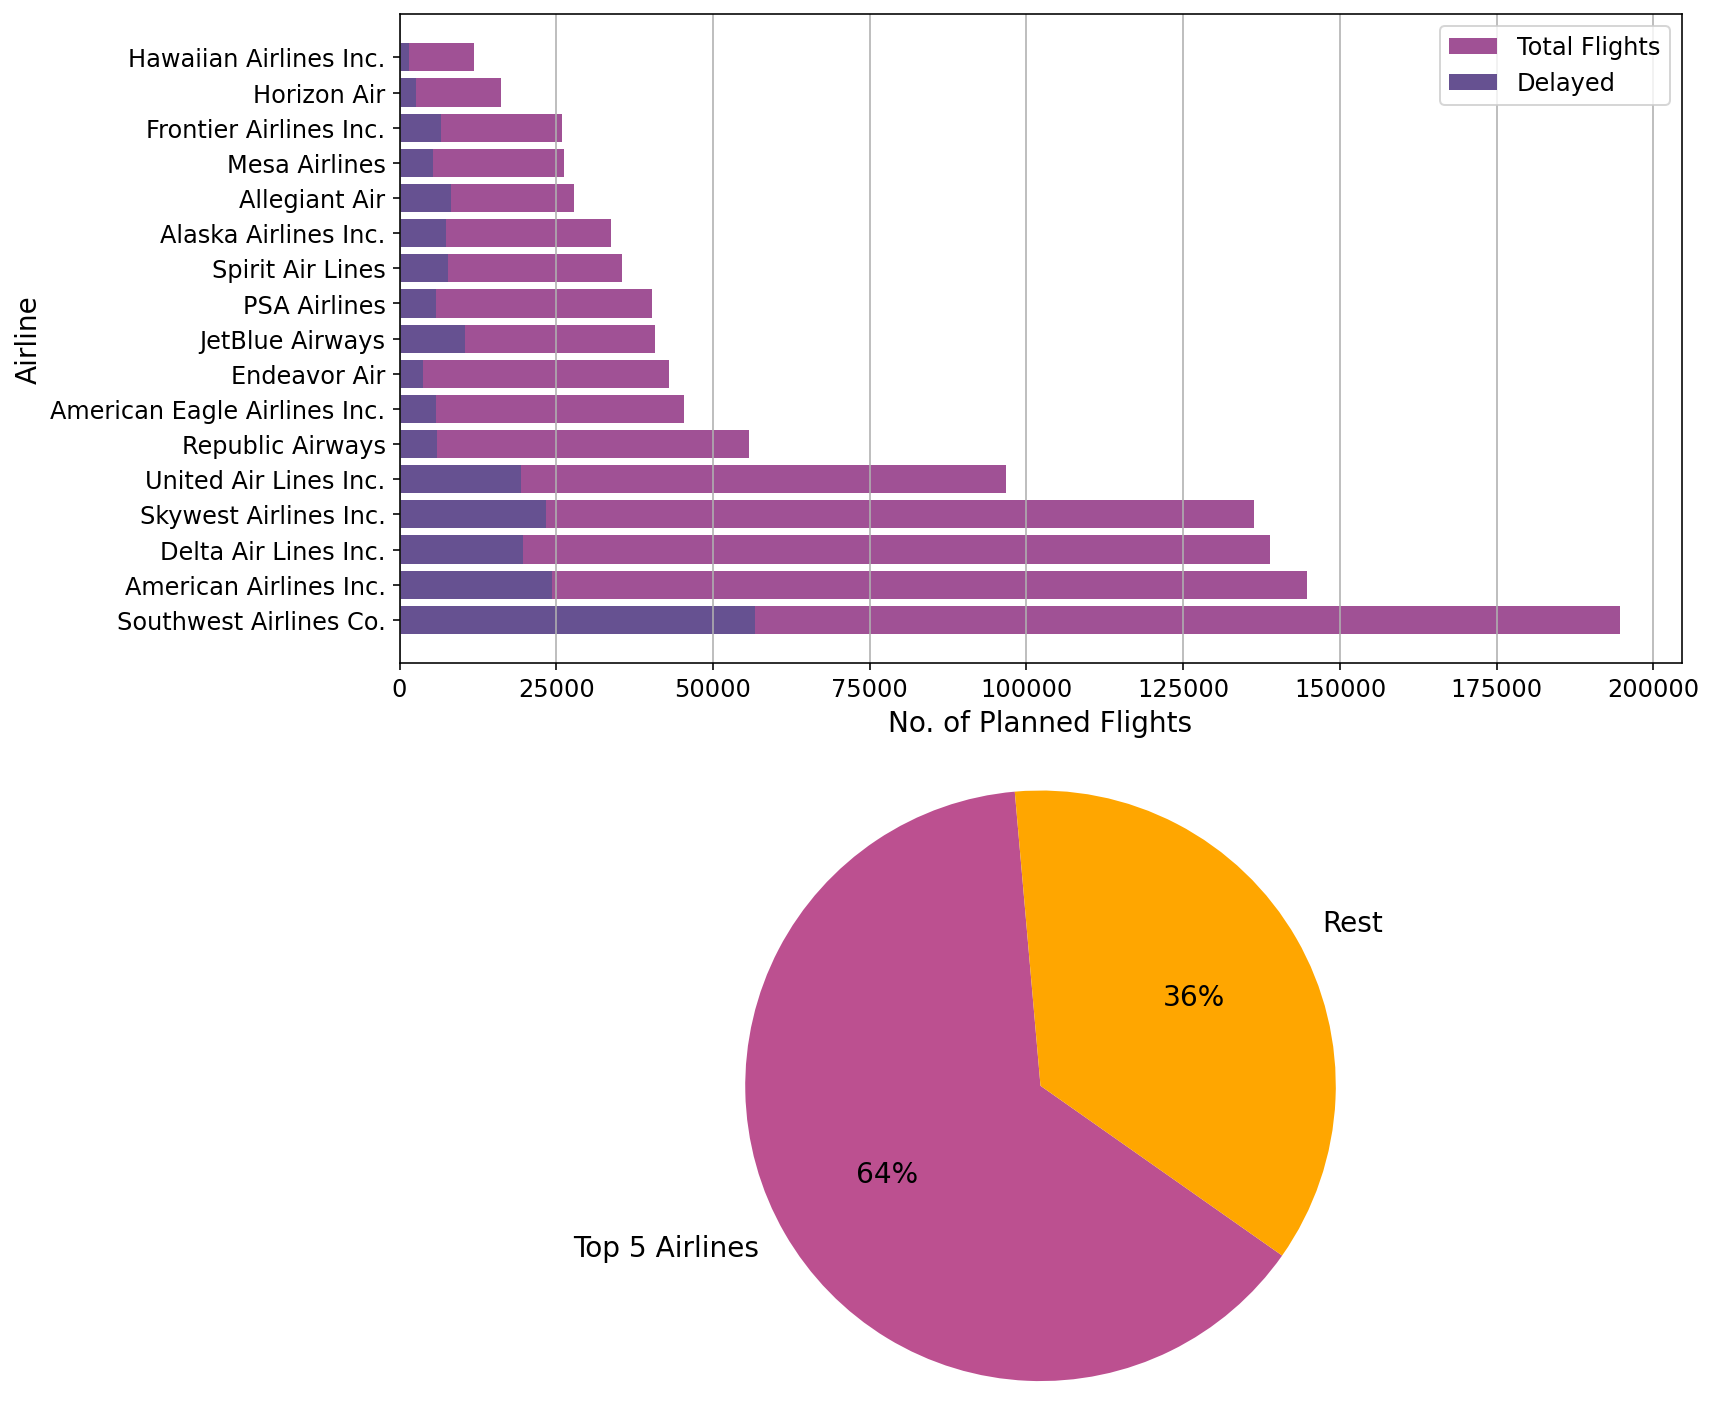

In [12]:
# Total number of flights per airline

top_airlines = flights_df.groupby("AIRLINE").agg({
    "year": "count",
    "depdel15": "sum",
    "arrdelay": "mean",
    "CITY_dest": "nunique"
}).sort_values('year', ascending=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.barh(top_airlines.index,
         top_airlines['year'],
         label='Total Flights',
         color=PALETTE[3])
ax1.barh(top_airlines.index,
         top_airlines['depdel15'],
         label='Delayed',
         color=PALETTE[2])
ax1.set_ylabel('Airline')
ax1.set_xlabel('No. of Planned Flights')
ax1.legend()

#Market Share of top 5 airlines
labels = ['Top 5 Airlines', 'Rest']
sizes = [
    top_airlines.iloc[:5]['year'].sum(), top_airlines.iloc[5:]['year'].sum()
]
colors = ['blue', 'red']

# Create a pie chart
ax2.pie(sizes,
        labels=labels,
        colors=["#bc5090", "#ffa600"],
        autopct='%1.f%%',
        startangle=95,
        textprops={
            'fontsize': 14,
            'color': 'black'
        })

# Set aspect ratio to be equal to ensure a circular pie chart
ax2.axis('equal')
plt.tight_layout()

In [13]:
top_airlines

,year,depdel15,arrdelay,CITY_dest
AIRLINE,,,,
Southwest Airlines Co.,194737,56713.0,5.461903,104
American Airlines Inc.,144732,24331.0,1.073100,110
Delta Air Lines Inc.,138898,19755.0,1.225424,126
Skywest Airlines Inc.,136234,23334.0,6.688757,239
United Air Lines Inc.,96753,19333.0,3.646878,107
Republic Airways,55707,5996.0,-0.866051,84
American Eagle Airlines Inc.,45414,5836.0,-1.897731,149
Endeavor Air,43025,3738.0,-4.182279,111
JetBlue Airways,40806,10450.0,10.648653,62


In [14]:
print(f"Top 5 Airlines:\n")

for airline, row in top_airlines.iloc[:5].iterrows():
    print(f"{airline}: {row['year']:,} flights")

Top 5 Airlines:

Southwest Airlines Co.: 194,737.0 flights
American Airlines Inc.: 144,732.0 flights
Delta Air Lines Inc.: 138,898.0 flights
Skywest Airlines Inc.: 136,234.0 flights
United Air Lines Inc.: 96,753.0 flights


Top 5 Airlines have a collective market share of 65% compared to the other carriers. With Southwest Airlines at the top by a margin of 50k flights

In [15]:
delay_summary_df = flights_df.groupby("AIRLINE").agg({"year": "count",
                                   "depdel15": "sum",
                                    "arrdelay":"mean"})\
    .rename(columns={"year": "total_flights",
                     "depdel15": "total_delayed",
                    "arrdelay":"average_delay_min"})
delay_summary_df['delay_pct'] = (delay_summary_df['total_delayed'] /
                                 delay_summary_df['total_flights']) * 100

In [16]:
delay_summary_df = delay_summary_df.sort_values(['delay_pct'])

In [17]:
delay_summary_df['total_delayed'].sum(
) / delay_summary_df['total_flights'].sum()

0.1927444217209487

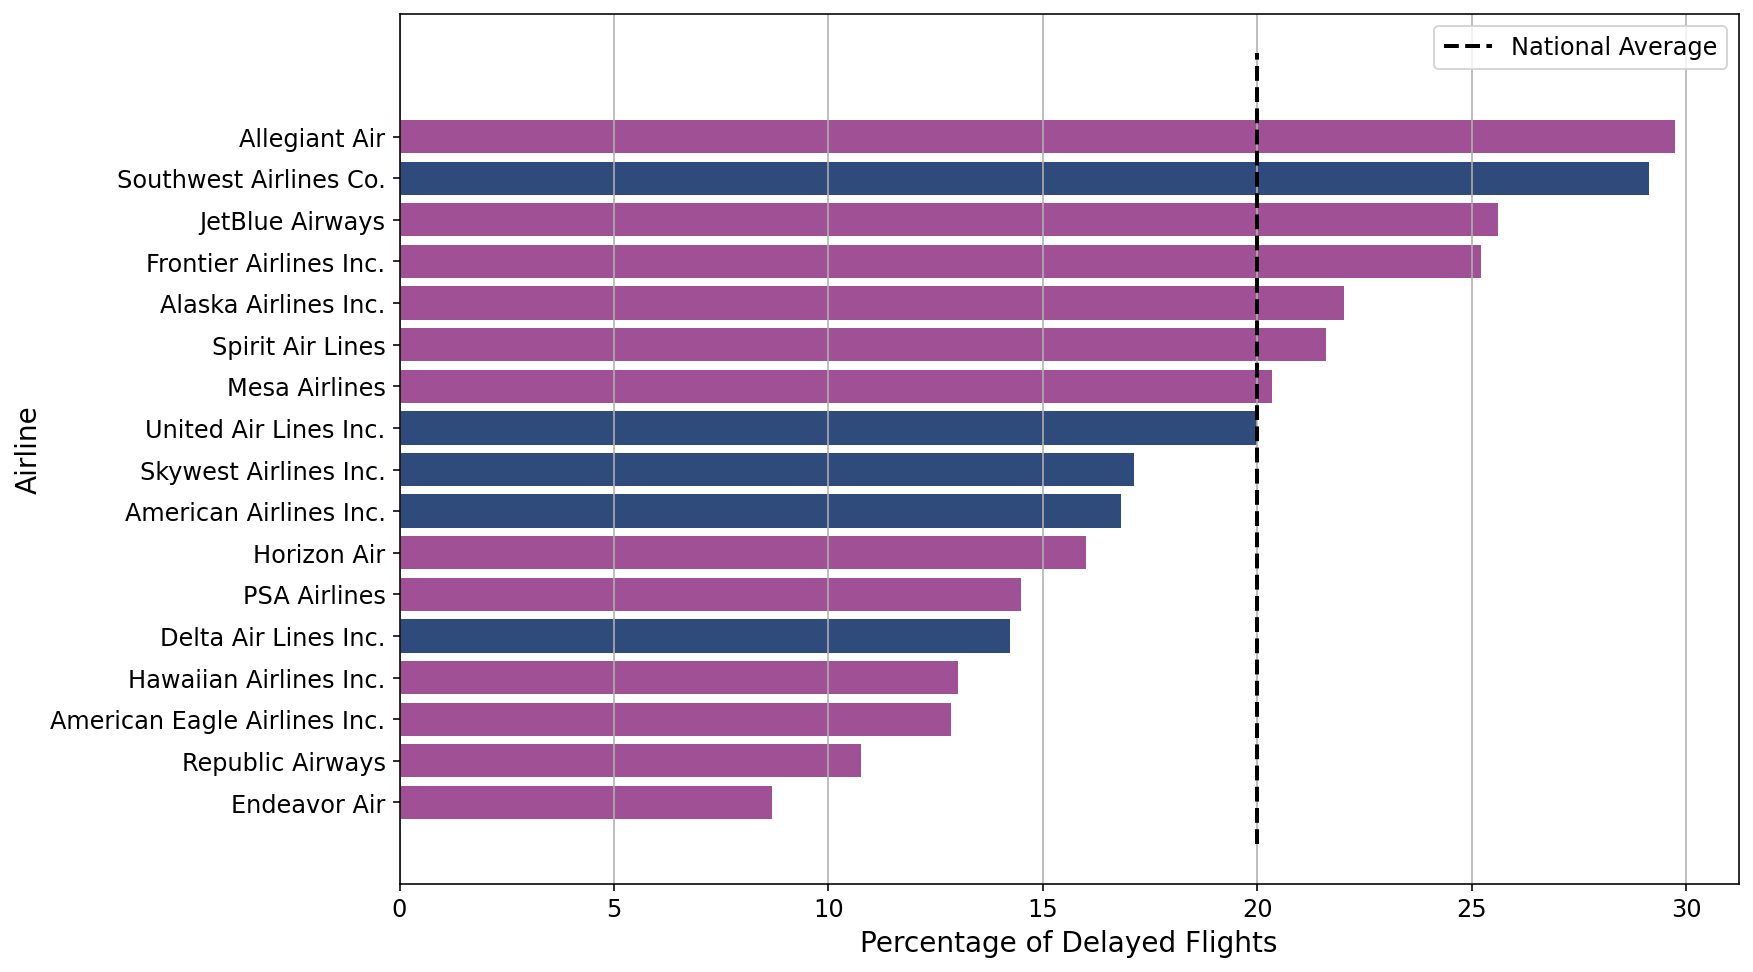

In [18]:
# Pct. Delay by airline
top5 = list(top_airlines.iloc[:5].index)
color = [
    PALETTE[1] if air in top5 else PALETTE[3]
    for air in list(delay_summary_df.index)
]
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(delay_summary_df.index, delay_summary_df['delay_pct'], color=color)
ax.vlines(x=20,
          ymin=-1,
          ymax=18,
          colors='k',
          linestyles='--',
          label='National Average')
ax.set_ylabel('Airline')
ax.set_xlabel('Percentage of Delayed Flights')
plt.legend()

In [19]:
delay_summary_df[delay_summary_df['delay_pct'] > 20]

,total_flights,total_delayed,average_delay_min,delay_pct
AIRLINE,,,,
Mesa Airlines,26164,5321.0,8.514061,20.337104
Spirit Air Lines,35426,7655.0,5.861931,21.608423
Alaska Airlines Inc.,33778,7436.0,7.793792,22.014329
Frontier Airlines Inc.,25963,6544.0,7.693849,25.205100
JetBlue Airways,40806,10450.0,10.648653,25.608979
Southwest Airlines Co.,194737,56713.0,5.461903,29.122868
Allegiant Air,27820,8273.0,16.756271,29.737599


In [20]:
delay_summary_df

,total_flights,total_delayed,average_delay_min,delay_pct
AIRLINE,,,,
Endeavor Air,43025,3738.0,-4.182279,8.687972
Republic Airways,55707,5996.0,-0.866051,10.763459
American Eagle Airlines Inc.,45414,5836.0,-1.897731,12.850663
Hawaiian Airlines Inc.,11955,1556.0,3.005672,13.015475
Delta Air Lines Inc.,138898,19755.0,1.225424,14.222667
PSA Airlines,40262,5830.0,1.132680,14.480155
Horizon Air,16200,2592.0,6.831619,16.000000
American Airlines Inc.,144732,24331.0,1.073100,16.811071
Skywest Airlines Inc.,136234,23334.0,6.688757,17.127883


In [21]:
delay_only = flights_df[flights_df['depdel15']==1].groupby("AIRLINE").agg({"arrdelay":"mean"})\
    .rename(columns={"arrdelay":"average_delay_min"}).sort_values('average_delay_min')

In [22]:
delay_only

,average_delay_min
AIRLINE,
Southwest Airlines Co.,37.098112
American Eagle Airlines Inc.,48.927466
United Air Lines Inc.,49.811381
Hawaiian Airlines Inc.,51.862492
Alaska Airlines Inc.,53.597411
Spirit Air Lines,53.699529
Republic Airways,55.144605
American Airlines Inc.,58.485902
Frontier Airlines Inc.,58.906418


- In terms of delayed flights, Allegiant Air is the worst offender, with almost 1/3rd of flights being delayed. Though it consists of a small portion of total flights. However, Southwest Airlines has the most flights by far and is also one of the worst offenders for delayed flights, with almost 1/3rd of flights being delayed, 9% worse than the national average. 

- Out of the top 5 airlines, Delta airlines is the most reliable in terms of delays on average, sitting 6% below the national average 

- Interestingly, when it is delayed, Delta is one of the worst offenders, being delayed over an hour on average, whereas southwest is lower at 40 mins

- This analysis does not control for any other variables such as distance or route 

Text(0.5, 0, 'Magnitude of Delays (min)')

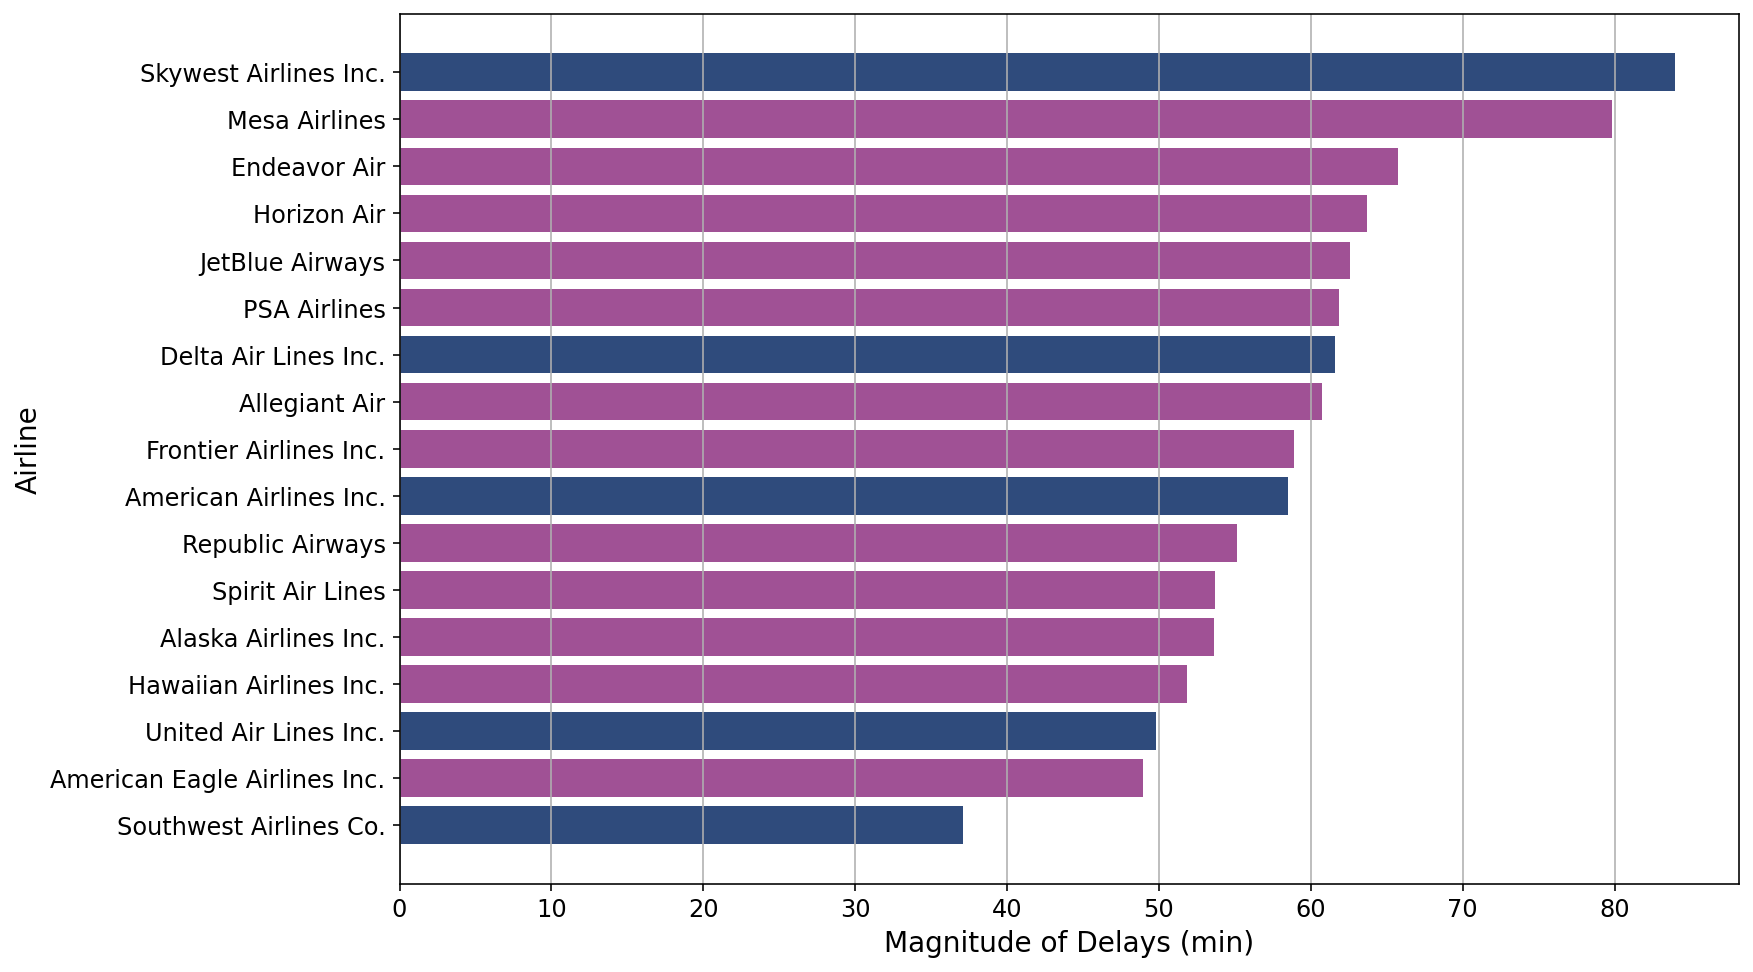

In [23]:
# Pct. Delay by airline
top5 = list(top_airlines.iloc[:5].index)
color = [
    PALETTE[1] if air in top5 else PALETTE[3] for air in list(delay_only.index)
]
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(delay_only.index, delay_only['average_delay_min'], color=color)
ax.set_ylabel('Airline')
ax.set_xlabel('Magnitude of Delays (min)')

In [24]:
average_delay_by_airline

NameError: name 'average_delay_by_airline' is not defined

## Airports 

In [25]:
city_delay_summary_df = flights_df.groupby("CITY").agg({"year": "count",
                                   "depdel15": "sum",
                                    "arrdelay":"mean",
                                    "cancelled":"sum"})\
    .rename(columns={"year": "total_flights",
                     "depdel15": "total_delayed",
                    "arrdelay":"average_delay_min"})
city_delay_summary_df['delay_pct'] = (
    city_delay_summary_df['total_delayed'] /
    city_delay_summary_df['total_flights']) * 100

In [26]:
top_cities_summary = city_delay_summary_df.sort_values(
    'total_flights', ascending=False).iloc[:20]

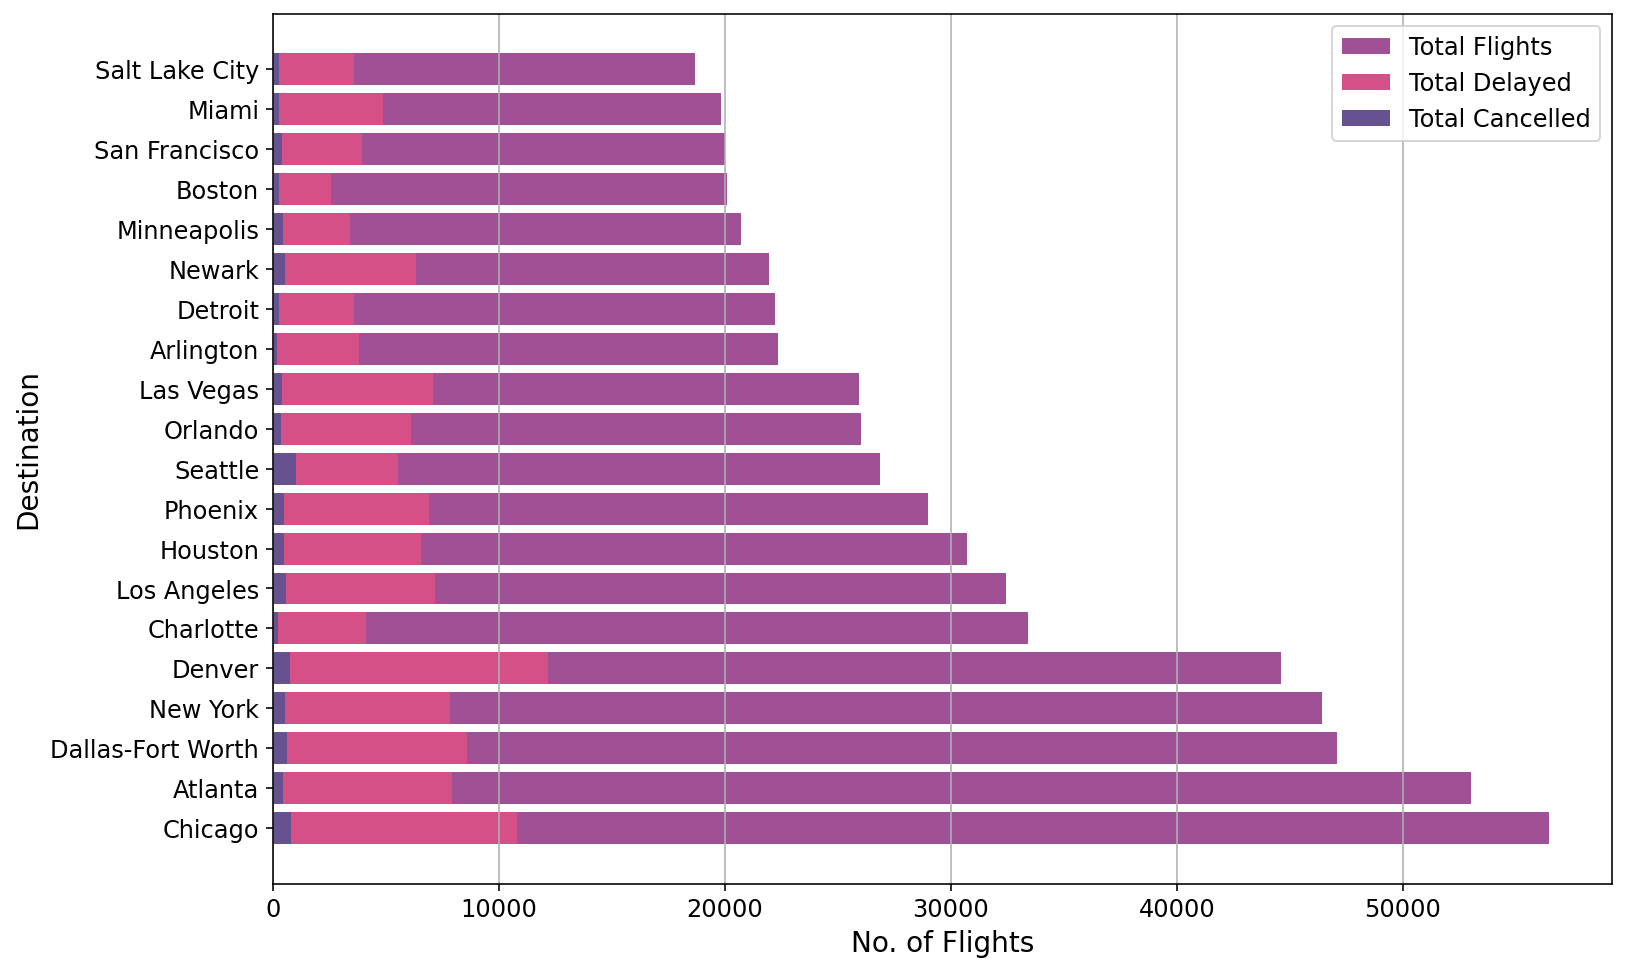

In [27]:
# Pct. Delay by airline
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(top_cities_summary.index,
        top_cities_summary['total_flights'],
        color=PALETTE[3],
        label='Total Flights')
ax.barh(top_cities_summary.index,
        top_cities_summary['total_delayed'],
        color=PALETTE[4],
        label='Total Delayed')
ax.barh(top_cities_summary.index,
        top_cities_summary['cancelled'],
        color=PALETTE[2],
        label='Total Cancelled')
ax.set_ylabel('Destination')
ax.set_xlabel('No. of Flights')
plt.legend()

In [28]:
state_summary_df = flights_df.groupby("STATE").agg({"year": "count",
                                   "depdel15": "sum",
                                    "arrdelay":"mean"})\
    .rename(columns={"year": "total_flights",
                     "depdel15": "total_delayed",
                    "arrdelay":"average_delay_min"})
state_summary_df['delay_pct'] = (state_summary_df['total_delayed'] /
                                 city_delay_summary_df['total_flights']) * 100

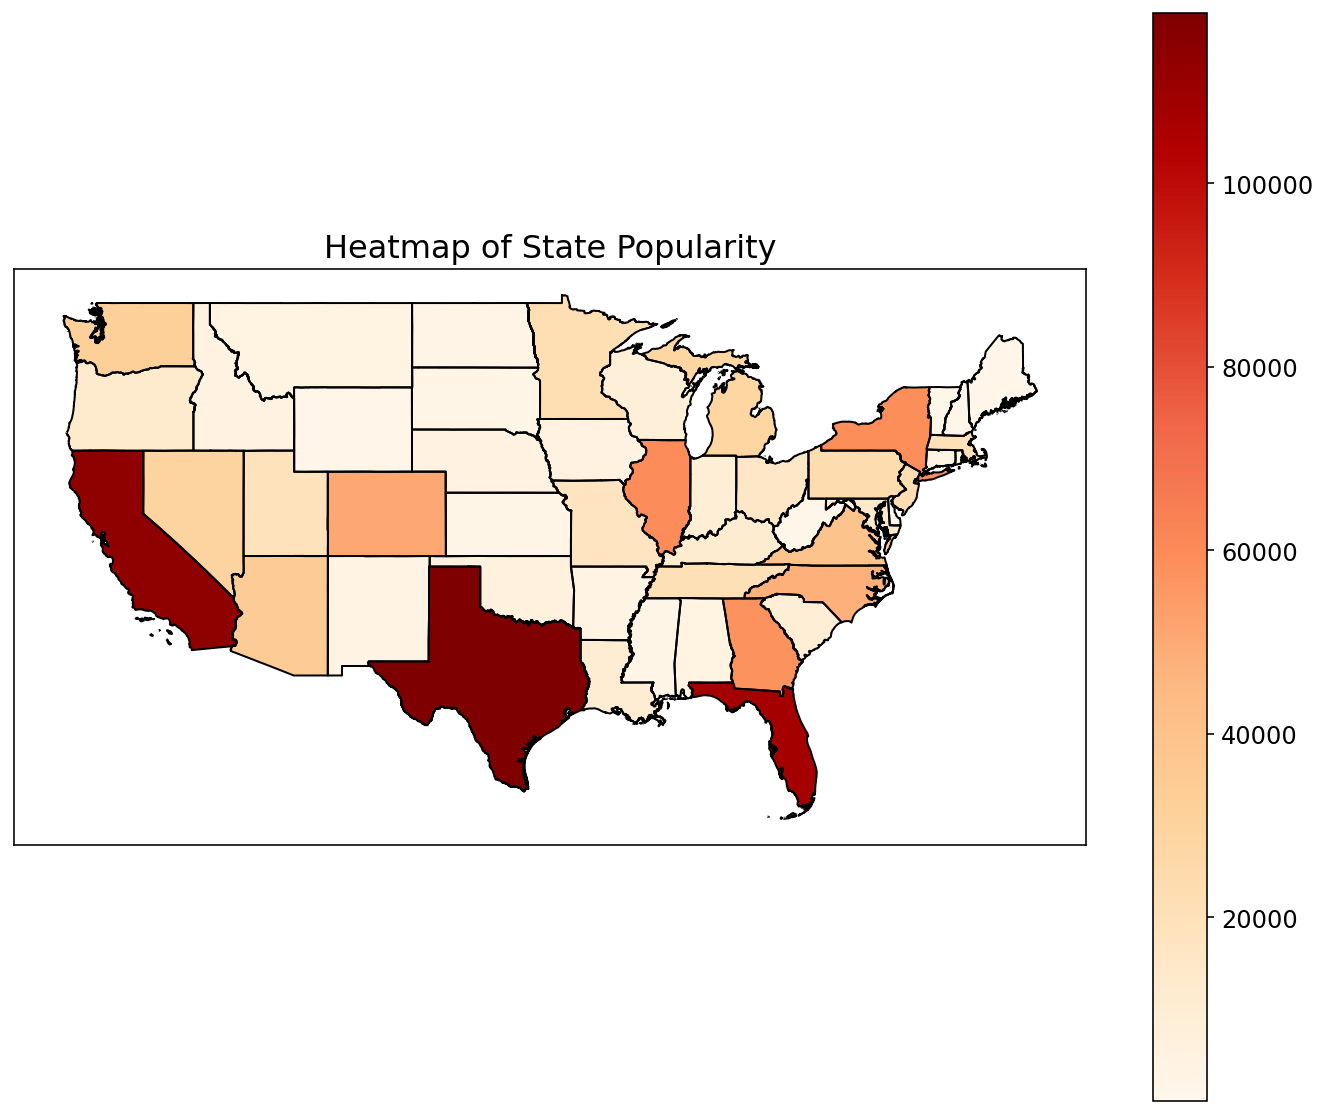

In [29]:
import geopandas as gpd

# Load the US map shapefile
us_map = gpd.read_file('./cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

# Filter the map to exclude Alaska and Islands
us_map = us_map[~us_map['STUSPS'].
                isin(['HI', 'VI', 'MP', 'GU', 'AK', 'AS', 'PR'])]

# Merge the U.S. map data with the state data
us_map = us_map.merge(state_summary_df,
                      left_on='STUSPS',
                      right_on="STATE",
                      how='left')

# Create the heatmap on the U.S. map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
us_map.boundary.plot(linewidth=1, color='k', ax=ax)  # Plot state boundaries
us_map.plot(column='total_flights',
            linewidth=1,
            ax=ax,
            cmap="OrRd",
            legend=True)
plt.title('Heatmap of State Popularity')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Show the plot
# plt.legend(title='Avg. Flights/Day')
plt.show()

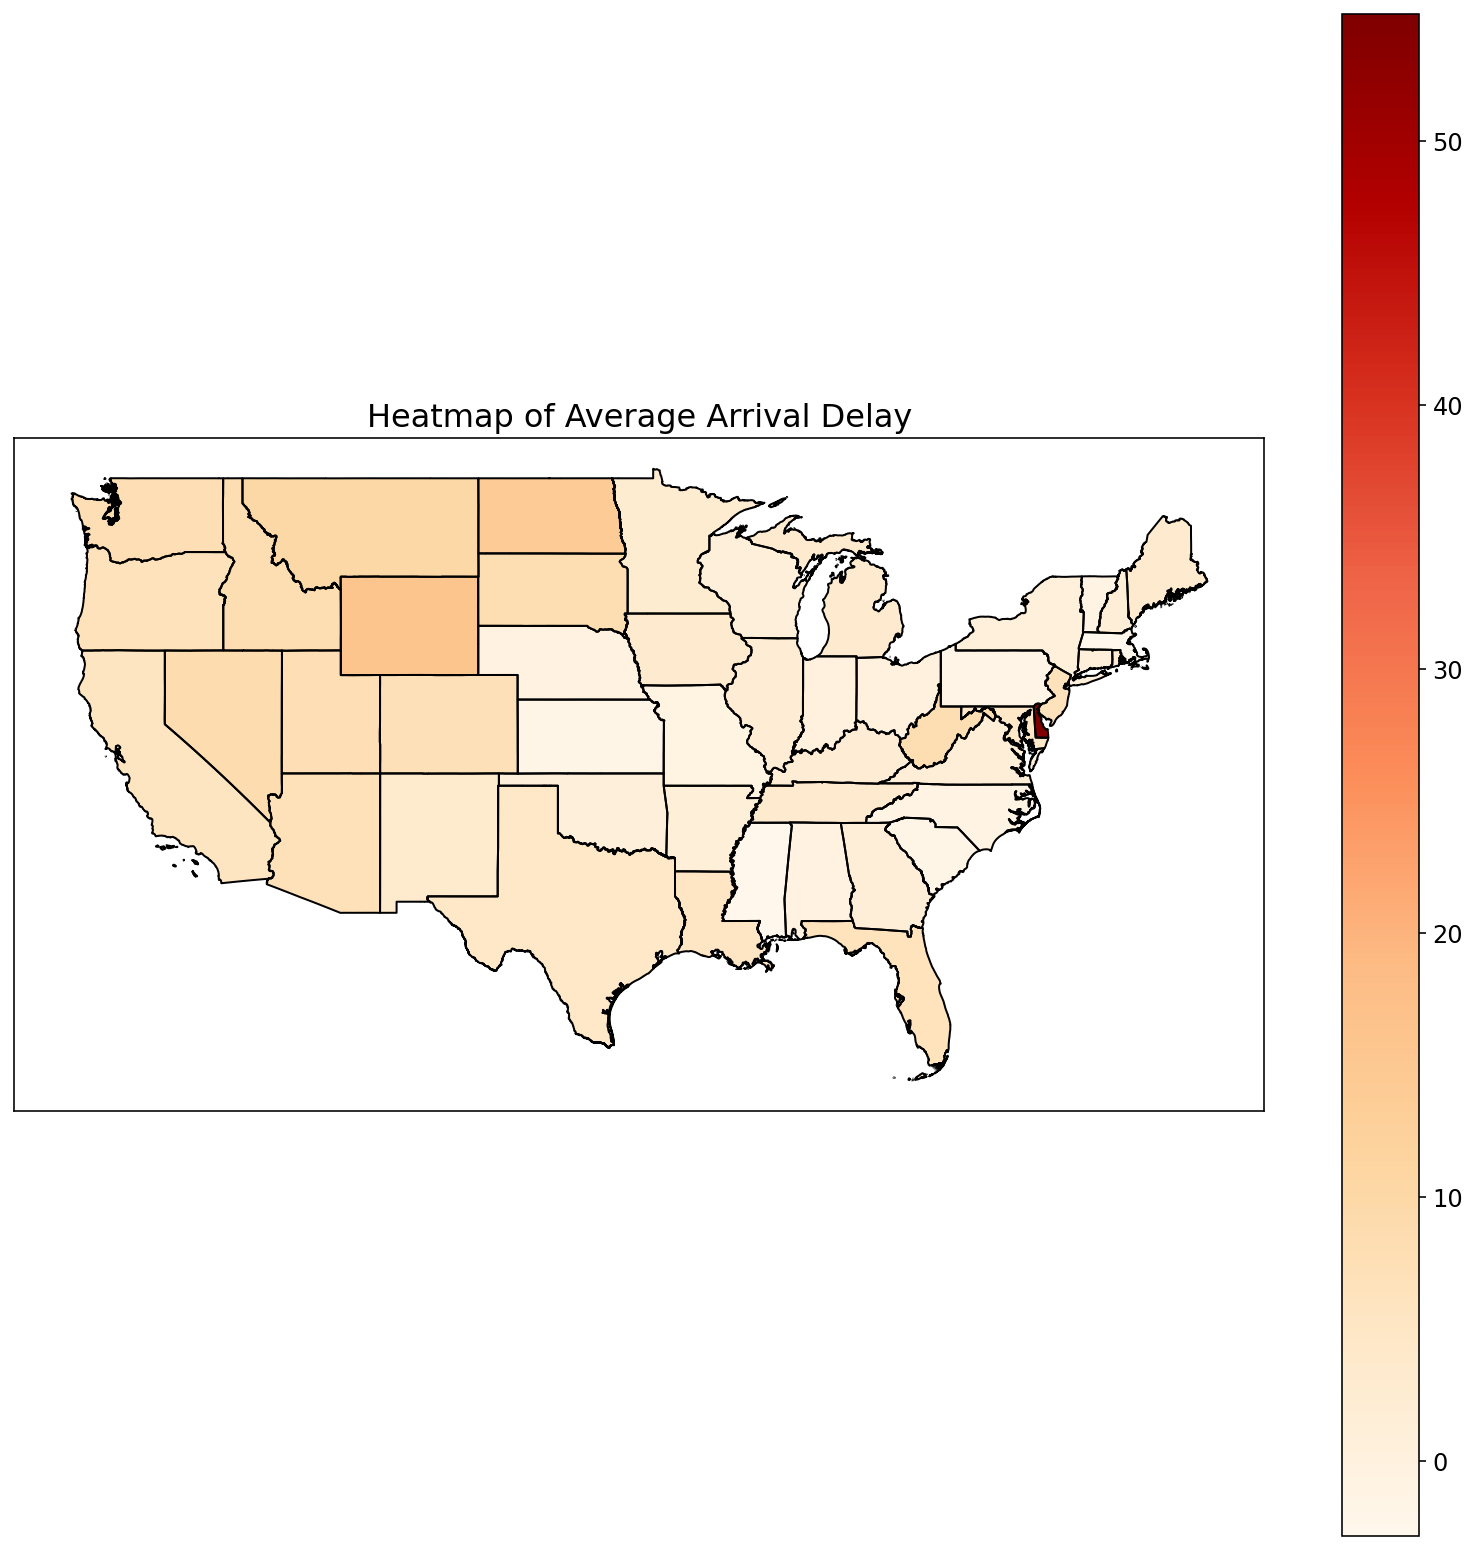

In [30]:
# Create the heatmap on the U.S. map
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
us_map.boundary.plot(linewidth=1, color='k', ax=ax)  # Plot state boundaries
us_map.plot(column='average_delay_min',
            linewidth=1,
            ax=ax,
            cmap="OrRd",
            legend=True)
plt.title('Heatmap of Average Arrival Delay')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Show the plot
# plt.legend(title='Avg. Flights/Day')
plt.show()

In [31]:
pop_routes = flights_df.groupby(["AIRPORT", "AIRPORT_dest"]).agg({
    'year': 'count',
    'CITY': 'last'
}).rename(columns={'year': 'No. Flights'})

In [32]:
pop_routes.sort_values(by='No. Flights',
                       ascending=False).iloc[:12].reset_index()

,AIRPORT,AIRPORT_dest,No. Flights,CITY
0,Chicago O'Hare International Airport,LaGuardia Airport (Marine Air Terminal),1865,Chicago
1,LaGuardia Airport (Marine Air Terminal),Chicago O'Hare International Airport,1865,New York
2,Ronald Reagan Washington National Airport,Gen. Edward Lawrence Logan International Airport,1830,Arlington
3,Gen. Edward Lawrence Logan International Airport,Ronald Reagan Washington National Airport,1827,Boston
4,Los Angeles International Airport,San Francisco International Airport,1732,Los Angeles
5,San Francisco International Airport,Los Angeles International Airport,1716,San Francisco
6,Kahului Airport,Honolulu International Airport,1587,Kahului
7,Honolulu International Airport,Kahului Airport,1587,Honolulu
8,Los Angeles International Airport,McCarran International Airport,1573,Los Angeles
9,Los Angeles International Airport,John F. Kennedy International Airport (New Yor...,1557,Los Angeles


In [33]:
popular_routes = {
    "Destination": [],
    "Origin": [],
    "Flights": [],
    "Avg. Arrival Delay": [],
}

for city in list(top_cities_summary.index)[:5]:
    top_routes = flights_df[(
        flights_df['CITY_dest'] == city)].groupby('AIRPORT').agg({
            'year':
            'count',
            'arrdelay':
            'mean'
        }).sort_values('year', ascending=False)
    for orig, row in top_routes.iloc[:5].iterrows():
        popular_routes['Destination'].append(city)
        popular_routes['Origin'].append(orig)
        popular_routes['Flights'].append(row['year'] / 365)
        popular_routes["Avg. Arrival Delay"].append(row['arrdelay'])

In [34]:
pop_routes = pd.DataFrame(popular_routes)

In [35]:
pop_routes[pop_routes['Destination'] == 'Chicago']

,Destination,Origin,Flights,Avg. Arrival Delay
0,Chicago,LaGuardia Airport (Marine Air Terminal),6.046575,-2.265834
1,Chicago,Denver International Airport,4.260274,9.052875
2,Chicago,Hartsfield-Jackson Atlanta International Airport,4.000000,5.317361
3,Chicago,Minneapolis-Saint Paul International Airport,3.975342,-1.347643
4,Chicago,Orlando International Airport,3.726027,3.480626


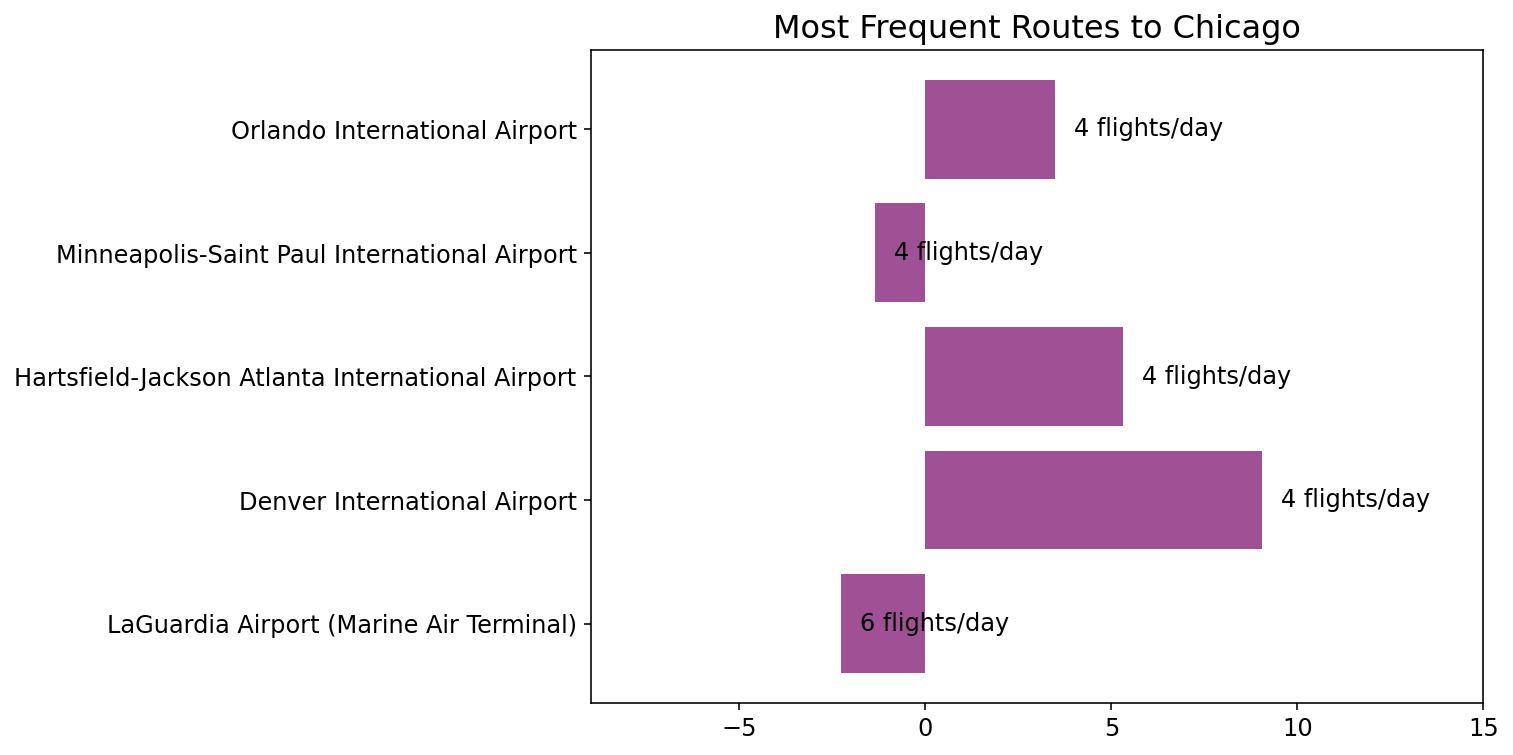

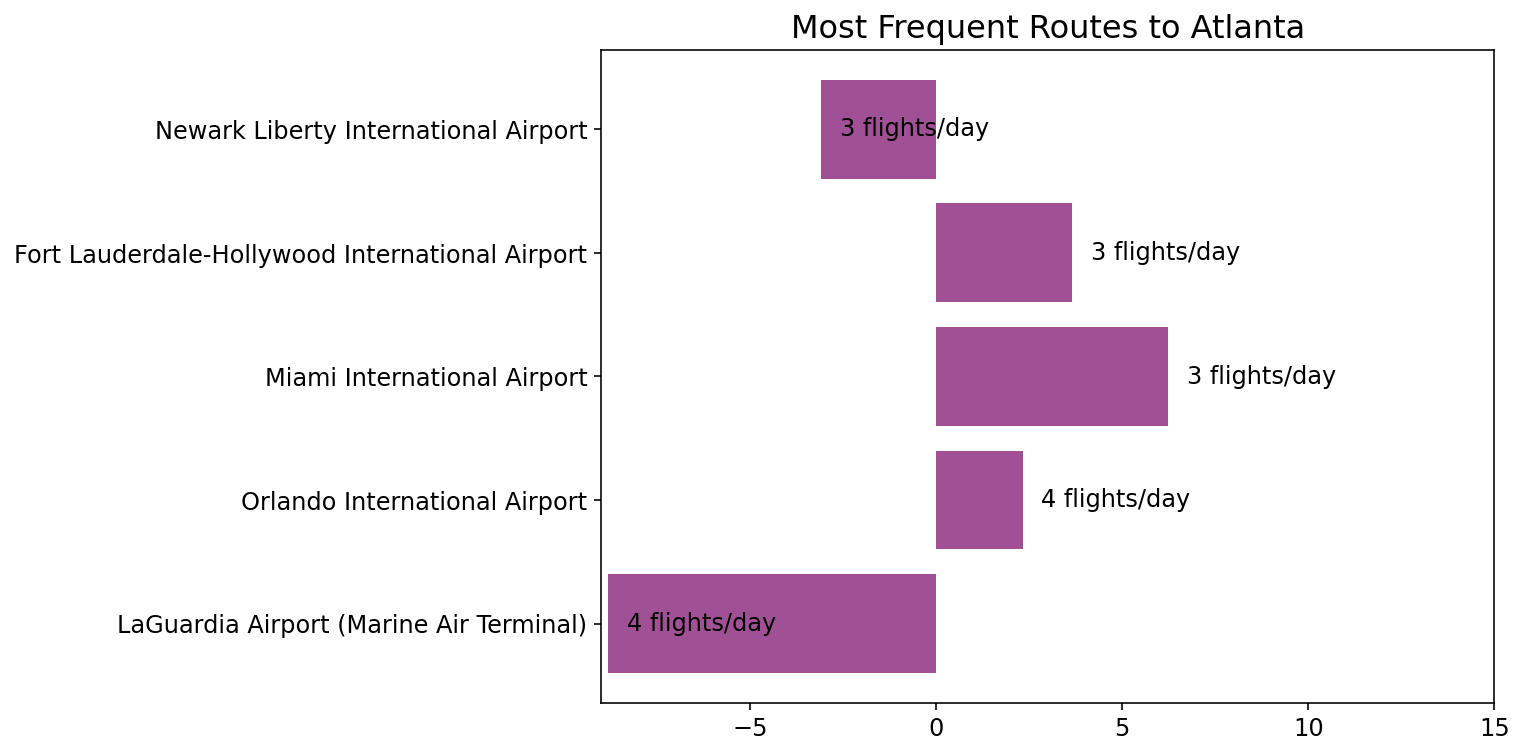

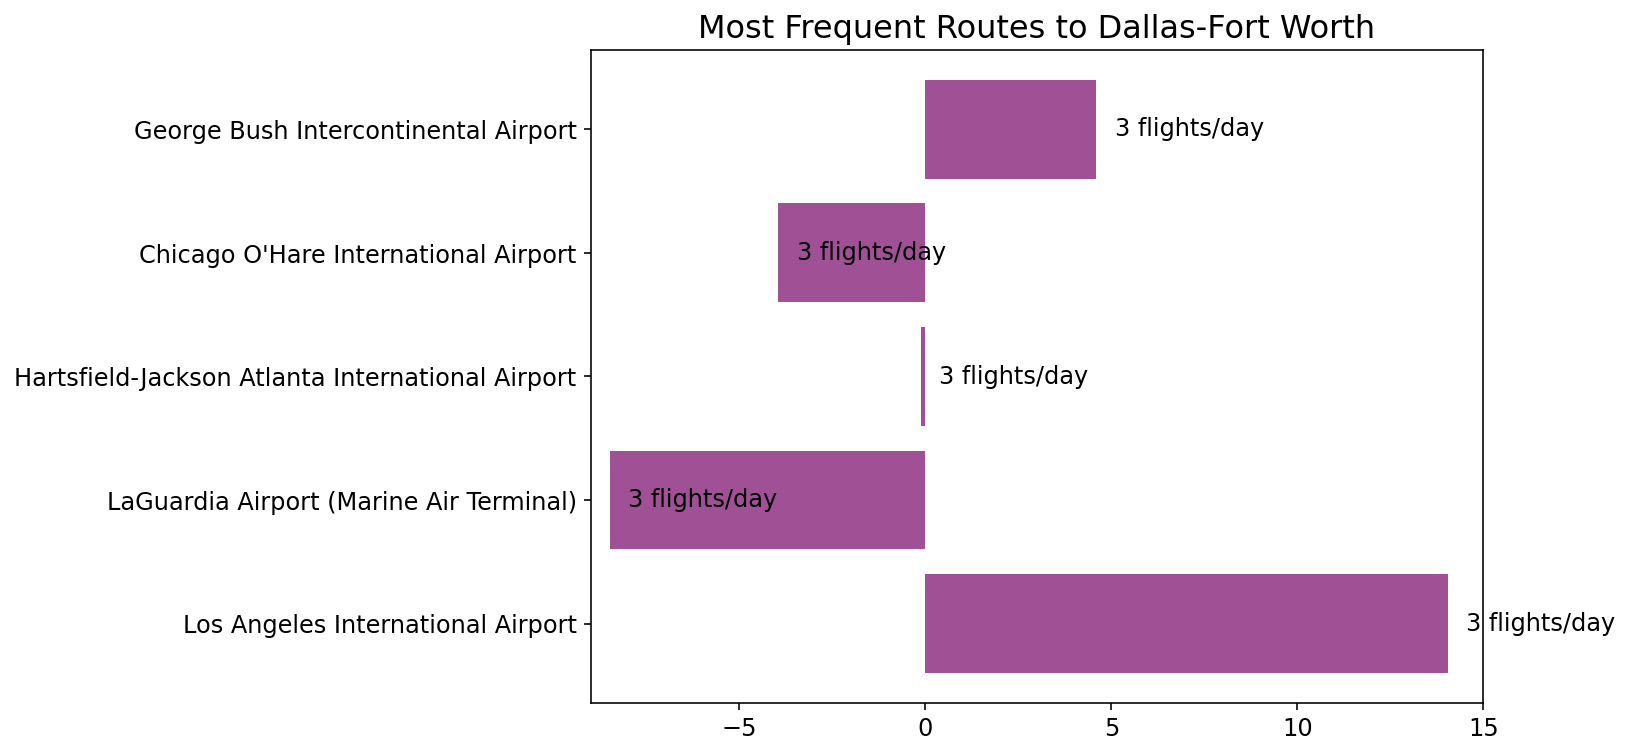

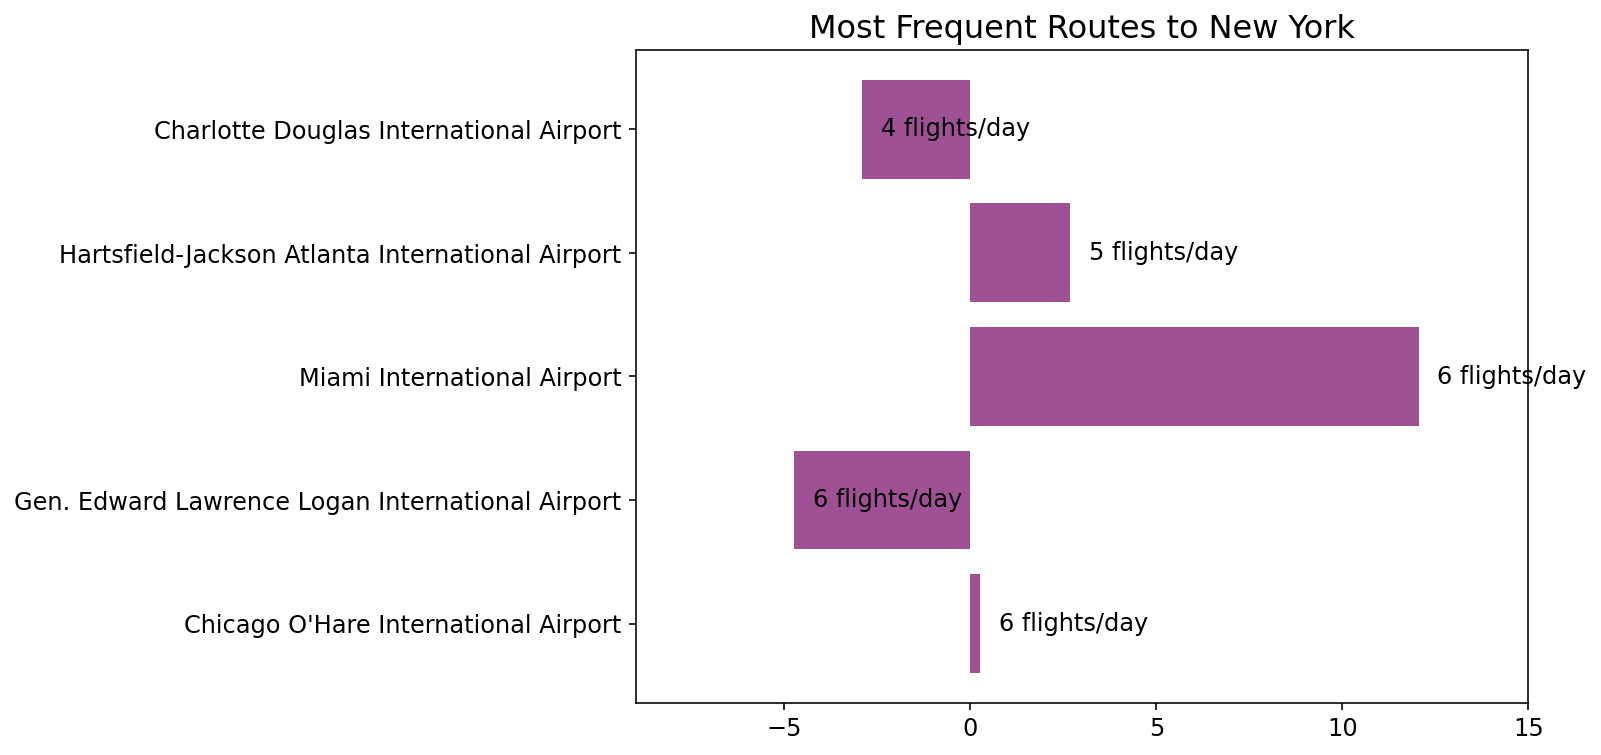

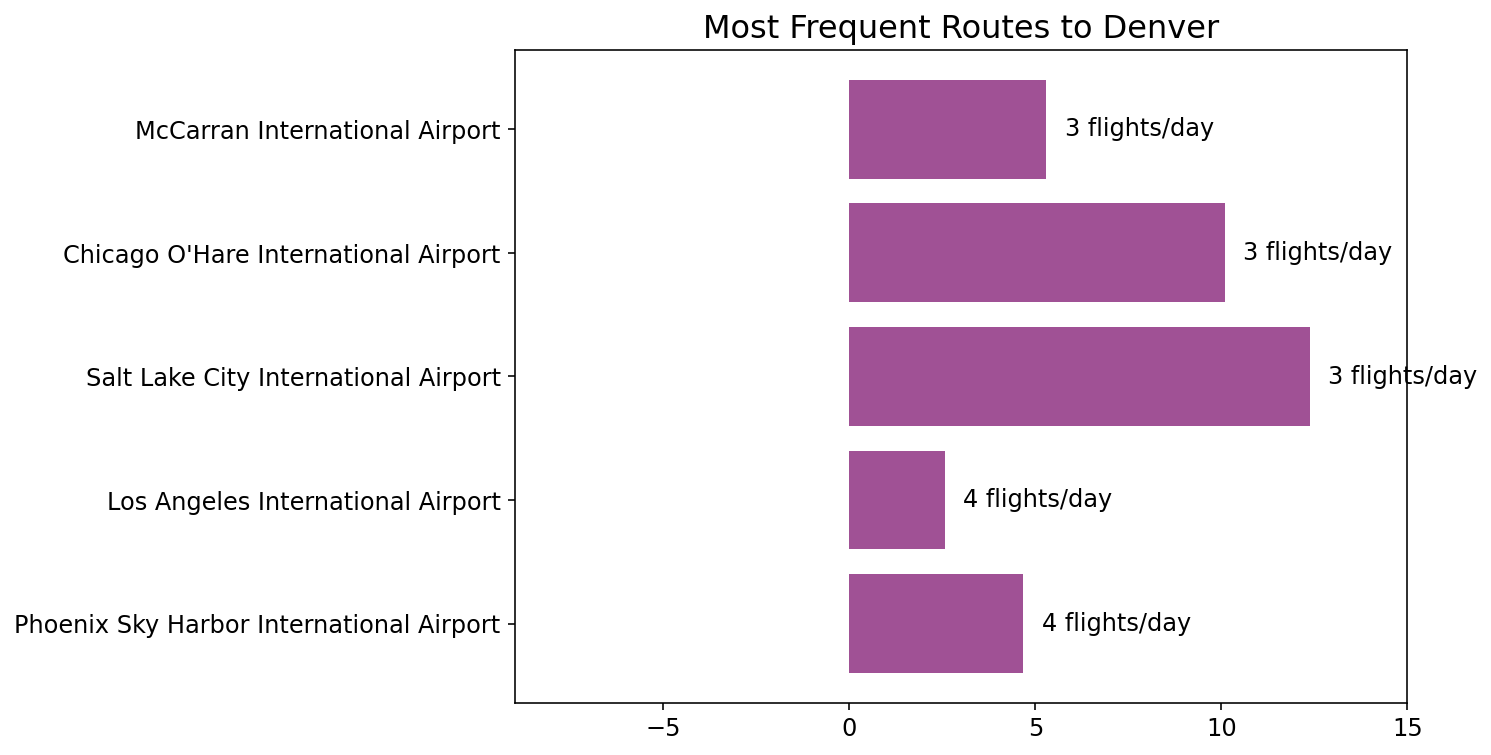

In [36]:
for city in list(top_cities_summary.index)[:5]:
    fig, ax = plt.subplots(figsize=(8, 6))
    filt = pop_routes[pop_routes['Destination'] == city].sort_values(
        'Flights', ascending=False)
    ax.barh('Origin', 'Avg. Arrival Delay', data=filt, color=PALETTE[3])
    for index, row in filt.iterrows():
        ax.text(row['Avg. Arrival Delay'] + 0.5,
                row['Origin'],
                f"{str(round(row['Flights']))} flights/day",
                ha='left',
                va='center',
                fontsize=12)
    ax.set_title(f"Most Frequent Routes to {city}")
    ax.set_xlim(-9, 15)
    plt.grid(False)

Here we look at the average arrival delays for the most popular destinations and the most frequent routes for those destinations. It is interesting to see that the most popular routes are on average, less than 10 minutes delayed

### Deep dive into a popular route

Here we will look into the most frequent route in the dataset, Chicago O'Hare <> LaGuardia 

In [37]:
ny2chi = flights_df[
    (flights_df['AIRPORT'] == "LaGuardia Airport (Marine Air Terminal)")
    & (flights_df['AIRPORT_dest'] == "Chicago O'Hare International Airport")]

In [38]:
m = ny2chi.groupby('month').agg({'year': 'count', 'arrdelay': 'mean'})

dow = ny2chi.groupby('dayofweek').agg({'year': 'count', 'arrdelay': 'mean'})

tod = ny2chi.groupby('dep_period_day').agg({
    'year': 'count',
    'arrdelay': 'mean'
})

In [39]:
m

,year,arrdelay
month,,
11,983,-6.890155
12,882,0.635417


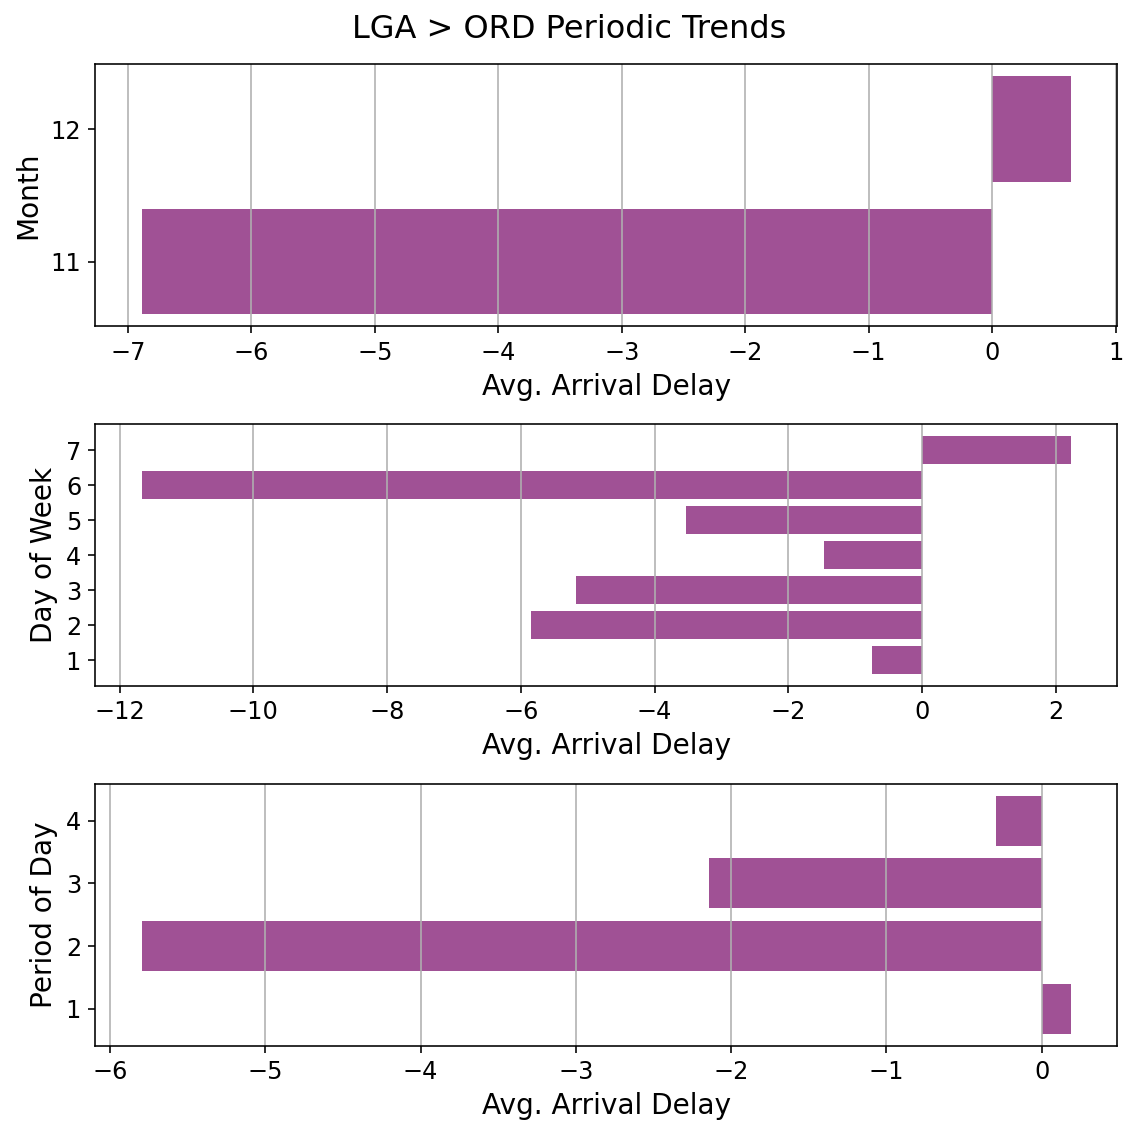

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
ax1.barh(m.index, m.arrdelay, color=PALETTE[3])
ax1.set_yticks([11, 12])
ax1.set_ylabel('Month')
ax1.set_xlabel('Avg. Arrival Delay')

ax2.barh(dow.index, dow.arrdelay, color=PALETTE[3])
ax2.set_yticks(range(1, 8))
ax2.set_ylabel('Day of Week')
ax2.set_xlabel('Avg. Arrival Delay')

ax3.barh(tod.index, tod.arrdelay, color=PALETTE[3])
ax3.set_yticks(range(1, 5))
ax3.set_ylabel('Period of Day')
ax3.set_xlabel('Avg. Arrival Delay')

plt.suptitle('LGA > ORD Periodic Trends', fontsize=16)
plt.tight_layout()

# Can we predict whether a flight will be delayed? 

In this section, I will attempt to train a simple classification model that attemps to predict whether or not a flight will be delayed. 

## Create training dataset

For the training dataset, we will only use columns that contain information about the flight BEFORE its departure and attempt to predict whether this flight will be delayed more than 15 mins (depdel15) as a binary classification task. For simplicity, I will only use data from the top 5 airlines and top 10 airports 

In [ ]:
import itertools
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [ ]:
flights_df.head()

In [ ]:
training_columns = [
    "dayofweek",
    "AIRLINE",
    "CITY",
    "CITY_dest",
    "dep_period_day",
    "depdel15",
    "distance",
]

In [ ]:
training_data = flights_df[training_columns].copy()

In [ ]:
training_data.isna().sum() / len(training_data)

We will drop the rows for which we have missing data as it reflects a small proportion of the training data

In [ ]:
training_data.dropna(subset=['depdel15'], inplace=True)

In [ ]:
training_data.isna().sum() / len(training_data)

In [ ]:
training_data.dayofweek.value_counts()

In [ ]:
top_5_airlines = list(top_airlines.index[:-6:-1])
top_10_cities = list(top_cities_summary.index[:10])

In [ ]:
#Create a subset off th training data for selected airlines and destinations

training_data = training_data[(training_data.AIRLINE.isin(top_5_airlines))
                              & (training_data.CITY.isin(top_10_cities))
                              & (training_data.CITY_dest.isin(top_10_cities))]

In [ ]:
training_data.depdel15.value_counts()

The dataset is slightly imbalanced. May need to use some balancing techniques 

In [ ]:
X = training_data.drop(columns='depdel15')
y = training_data['depdel15']

X_test, X_train, y_test, y_train = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
numerical_features = ['distance']
categorical_features = [
    'dayofweek', 'dep_period_day', 'AIRLINE', 'CITY', 'CITY_dest'
]

In [ ]:
num_transformer = Pipeline([('scaler', MinMaxScaler())])

# Categorical
cat_transformer = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features)
])
preprocessor

In [ ]:
pipe_baseline = Pipeline([('preprocessor', preprocessor),
                          ('xgb_model', XGBClassifier())])
pipe_baseline.fit(X_train, y_train)

In [ ]:
baseline_prediction = pipe_baseline.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(y_test, baseline_prediction)

In [ ]:
test_accuracy

In [ ]:
print(classification_report(y_test, baseline_prediction))

In [ ]:
cm = confusion_matrix(y_test, baseline_prediction)

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plt.figure()
plot_confusion_matrix(cm, ['No Delay', 'Delay'], cmap='YlOrRd')

Even though the simple baseline model has an accuracy of 80%, this model is quite poor in terms of precision and recall, which are much more important metrics to prioritise in this scenario. The poor performance is likely due to the class imbalance in the dataset. We can attempt some finetuning to see if any of the metrics improve

## Fine-tune model

In [ ]:
param_grid = {
    'xgb_model__learning_rate': [0.1, 0.01, 0.5],
    'xgb_model__max_depth': [6],
    'xgb_model__min_child_weight': [1, 5, 10],
    'xgb_model__subsample': [0.7, 1],
    'xgb_model__n_estimators': [30, 50, 100, 150],
    'xgb_model__scale_pos_weight': [1, 1.5, 1.7, 2]
}

In [ ]:
grid_search = GridSearchCV(pipe_baseline,
                           param_grid,
                           scoring='recall',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid_search.best_params_

print("Grid Search results:")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

best_estimator = grid_search.best_estimator_.fit(X_train, y_train)
fine_tuned_prediction = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, fine_tuned_prediction)

print("Validation accuracy: {:.4}%".format(test_accuracy * 100))
print("")
print(classification_report(y_test, fine_tuned_prediction))

Although the results are still not optimal, fine-tuning has resulted in an improvement in recall and f-1 score

In [ ]:
cm = confusion_matrix(y_test, fine_tuned_prediction)
plot_confusion_matrix(cm, ['No Delay', 'Delay'], cmap='YlOrRd')